## 链家数据分析
我们来根据我们之前爬取的链家网数据，做一点小小的数据分析。

### 0.载入数据

In [3]:
import pandas as pd
lj_data = pd.read_csv('../LJdata.csv')

大家规范一点，用英文的column name，这样免去了后续的一些问题(主要是编码问题)

In [4]:
lj_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [5]:
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Perfect, 然后咱们就可以开始做点分析了

### 查看数据的形状和信息
hint:都还记得info/describe/shape的用法吧，用起来！

In [6]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [7]:
lj_data.shape

(2760, 13)

In [12]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html


In [13]:
lj_data.describe()

,price,view_num
count,2760.000000,2760.000000
mean,7570.800725,13.448913
std,6316.204986,12.746202
min,1300.000000,0.000000
25%,4500.000000,4.000000
50%,6000.000000,10.000000
75%,8500.000000,19.000000
max,210000.000000,122.000000


### 找到最近更新信息的20套房子

In [15]:
lj_data.sort_values(by='update_time').tail(20) 
#lj_data.update_time.value_counts().tail(20)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
467,万柳租房,康桥水郡,昆玉河畔观景大宅 复式4居20平露台有车位 明厨明卫,4室1厅,199平米,25000,高楼层(共16层),2004年建板楼,东 西,2017.07.27,7,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101744630.html
2358,新华大街租房,怡佳家园,怡佳家园 5室2厅 15000元,5室2厅,240平米,15000,高楼层(共28层),2002年建塔楼,东 南 北,2017.07.27,6,距离八通线通州北苑站1062米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101704899.html
2356,亚运村租房,安慧里四区,安慧里简装朝东南一居室，家具家电齐全，可拎包入住,1室1厅,43平米,4500,高楼层(共6层),1989年建板楼,东南,2017.07.27,19,距离5号线惠新西街北口站441米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101174347.html
475,金宝街租房,禾风相府,禾风相府 舒适三居 拎包入住 交通便利,3室1厅,163平米,32000,高楼层(共14层),2004年建板塔结合,南 北,2017.07.27,13,距离5号线东四站619米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101767933.html
2334,苏州桥租房,中湾国际,中湾国际 1室0厅 6500元,1室0厅,37平米,6500,中楼层(共19层),2007年建塔楼,北,2017.07.27,2,距离10号线苏州街站791米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101849862.html
2335,玉泉营租房,鸿业兴园一区,鸿业兴园 正规两居室 家电家具全齐,2室1厅,91平米,5500,中楼层(共16层),2006年建板塔结合,南,2017.07.27,4,随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101831875.html
1153,滨河西区租房,双峪路小区,双峪路小区有一精装修两室一厅出租,2室1厅,48平米,3100,中楼层(共5层),1981年建板楼,南,2017.07.27,12,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101790165.html
1829,北七家租房,西湖新村,水系社区 带花园的2居室 北边无遮挡采光充裕 居住舒适,2室2厅,94平米,3400,低楼层(共7层),2000年建板楼,南 北,2017.07.27,12,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101630022.html
1158,通州北苑租房,长城国际,长城国际 精装一居 电梯房 拎包入住,1室1厅,53平米,3300,中楼层(共22层),2010年建塔楼,东,2017.07.27,18,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101791183.html
487,陶然亭租房,四平园,四平园 1室1厅 4600,1室1厅,53平米,4600,中楼层(共6层),1996年建板楼,东,2017.07.27,14,距离4号线陶然亭站719米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779348.html


### 平均看房人数

In [16]:
lj_data['view_num'].mean()

13.44891304347826

In [17]:
lj_data['view_num'].median()

10.0

### 房龄最小的20套房子的平均看房人数、平均面积...

In [18]:
import numpy as np

In [19]:
def get_age(x):
    try:
        return 2018-int(x[:4])
    except:
        return np.NaN

In [20]:
lj_data.loc[:,'age'] = lj_data['build_time'].apply(get_age)

In [21]:
lj_data.head(1)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0


In [25]:
def get_area(x):
    try:
        return int(x[:-2])
    except:
        return ''

In [26]:
lj_data.loc[:,'area_num'] = lj_data['area'].apply(get_area)

In [27]:
lj_data.nsmallest(columns='age', n=20)[['view_num', 'area_num']].mean()  #nsmallest取最小值

view_num     11.55
area_num    104.05
dtype: float64

### 房子价格的分布(平均，方差，中位数)

In [28]:
lj_data['price'].describe()

count      2760.000000
mean       7570.800725
std        6316.204986
min        1300.000000
25%        4500.000000
50%        6000.000000
75%        8500.000000
max      210000.000000
Name: price, dtype: float64

In [29]:
print("房子价格的平均数为{}".format(lj_data['price'].mean()))

房子价格的平均数为7570.800724637681


### 最受欢迎的朝向(平均看房人数)

In [33]:
tmp_df = lj_data[['direction', 'view_num']].groupby('direction').mean()

In [36]:
tmp_df.reset_index(inplace=True)

In [41]:
tmp_df.head()

,direction,view_num
0,东,13.728395
1,东 东北,34.000000
2,东 东南,8.000000
3,东 东南 南,21.000000
4,东 北,19.454545


In [42]:
tmp_df.sort_values(by='view_num', ascending=False)

,direction,view_num
1,东 东北,34.000000
29,西 北,28.250000
34,西南 西,25.000000
3,东 东南 南,21.000000
30,西北,19.478261
4,东 北,19.454545
7,东 南 西,19.000000
24,南 西,16.461538
31,西南,16.439490
21,北,16.369369


### 房型数量分布

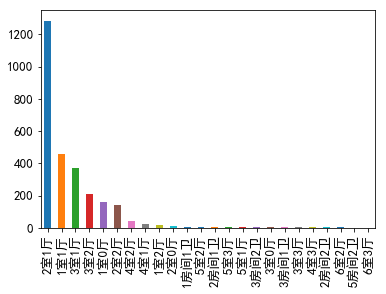

In [48]:
%matplotlib inline
import matplotlib as plt
plt.rc('font', family='SimHei', size=13)
lj_data['house_type'].value_counts().plot(kind='bar')

### 最受欢迎的房型

In [44]:
lj_data[['house_type','view_num']].groupby('house_type').mean().sort_values(by='view_num', ascending=False).head()

In [45]:
tmp.reset_index(inplace=True)
tmp.head()

,house_type,view_num
0,1室0厅,14.280255
1,1室1厅,15.398249
2,1室2厅,17.058824
3,1房间1卫,9.250000
4,2室0厅,15.777778


In [46]:
tmp.sort_values(by='view_num', ascending=False)

,house_type,view_num
23,6室3厅,21.000000
7,2房间1卫,19.833333
2,1室2厅,17.058824
13,3房间1卫,17.000000
8,2房间2卫,16.000000
4,2室0厅,15.777778
1,1室1厅,15.398249
0,1室0厅,14.280255
14,3房间2卫,14.250000
5,2室1厅,13.698598


### 房子的平均租房价格(按平米算)

In [49]:
lj_data['area_num'] = lj_data['area'].apply(lambda x:int(x[:-2]))
lj_data.loc[:,'price_per_m2'] = lj_data['price']/lj_data['area_num']

In [50]:
lj_data['price_per_m2'].mean()

87.72268429900429

### 最受关注的小区

In [51]:
lj_data.head(1)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.0


In [52]:
tmp = lj_data[['address','view_num']].groupby('address').agg(sum)

In [53]:
tmp.reset_index(inplace=True)
tmp.head()

,address,view_num
0,10AM新坐标,43
1,11站,41
2,BOBO自由城,10
3,CBD总部公寓二期,9
4,DBC加州小镇,23


In [54]:
tmp.sort_values(by='view_num', ascending=False).head(1)

,address,view_num
951,清芷园,246


### 出租房源最多的小区

In [55]:
lj_data['address'].value_counts()

远洋山水           19
润枫水尚           10
天畅园             9
芍药居北里           9
后现代城            9
太阳公元            9
金地仰山            9
大方居             9
慧忠里             9
安贞西里            8
鸿坤理想城礼域府        8
鸿坤理想城大满贯        8
乐城              8
沿海赛洛城           8
曙光里             8
裕中西里            8
裕中东里            7
京贸国际城西区         7
西潞苑小区           7
望京新城            7
北京新天地           7
梵谷水郡            7
金隅万科城           7
炫特嘉园二期          7
上元君庭            6
苹果社区南区          6
西环里             6
京畿道             6
碧水云天            6
阳光丽景            6
               ..
安慧里四区           1
牡丹园北里           1
幸福时光            1
丰侨公寓            1
东架松             1
蒲安北里            1
八里庄北里小区         1
老管委会宿舍          1
丽景长安            1
六铺炕一区           1
馨莲茗园            1
新中西街            1
后永康胡同2号院4号院     1
名流花园            1
万寿路26号院         1
行宫园一里           1
莲花池东路9号院        1
安华里一区           1
柳芳北里            1
复兴路乙4号院         1
凤凰城三期           1
和平里四区           1
主语家园            1
延静里中街           1
太平路42号院   

### 出租房源最多的地区(大家从详情页可以对标到 海淀/西城/东城/朝阳 不同城区...)

In [56]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36.0,63,101.587302


### 集中供暖和非集中供暖的有多少家，平均价格是多少

In [58]:
lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x: "集中供暖" in x)  #true or false

In [59]:
lj_data[['center_heating','price']].groupby('center_heating').agg('mean').reset_index()

,center_heating,price
0,False,7317.436975
1,True,7623.603327


### 哪个城区的租房价格最贵，平均价格是多少

In [62]:
lj_data.groupby('district').price.agg(max)

district
CBD租房         27000
七里庄租房          9000
万寿路租房         10000
万柳租房          27000
三元桥租房         27000
三里屯租房         26000
上地租房          12000
世纪城租房         25000
东关租房           7500
东四租房           9000
东坝租房           7000
东大桥租房         26000
东直门租房         36500
东花市租房         25000
中关村租房          7500
临河里租房          7600
丽泽租房           5600
乔庄租房           4200
九棵树(家乐福)租房    16000
二里庄租房          8500
五棵松租房         15000
五道口租房         13500
五里店租房          4800
亚运村小营租房       23000
亚运村租房         15000
交道口租房          8700
亦庄开发区其它租房      8500
亦庄租房          11000
健翔桥租房          6800
公主坟租房         15000
              ...  
车公庄租房         22000
通州北苑租房         9000
酒仙桥租房         45000
金宝街租房         32000
金融街租房         32000
长椿街租房         10000
长阳租房           4500
门头沟其它租房        4900
阎村租房           5500
阜成门租房         10000
陶然亭租房         16000
霍营租房           6000
青塔租房           5500
顺义其它租房         6800
顺义城租房          8500
颐和园租房          7500
首都机场租房         2500
马坡租房           5500
马家堡租房      

### 不同房型的平均/最大/最小面积

In [63]:
lj_data[['house_type','price']].groupby('house_type').agg(['mean','max','min'])

price                
                     mean     max     min
house_type                               
1室0厅          4945.541401   23000    1900
1室1厅          5442.735230   16000    1300
1室2厅          7664.705882   15000    2500
1房间1卫         3862.500000    4200    3600
2室0厅          5497.777778    6600    2980
2室1厅          6314.758567   26000    1500
2室2厅          8988.028169   35000    2200
2房间1卫         5100.000000    7200    2800
2房间2卫         7050.000000   10500    3600
3室0厅          6900.000000    7700    6500
3室1厅          9591.644205   32000    2200
3室2厅         13697.584541   40000    2600
3室3厅          6966.666667    7600    6500
3房间1卫         8533.333333   13000    5900
3房间2卫         5950.000000    8500    5000
4室1厅         14847.619048   32000    3500
4室2厅         15723.809524   45000    3500
4室3厅         12333.333333   15000   11000
5室1厅          6125.000000    9000    5000
5室2厅         17375.000000   32000    7500
5室3厅         15040.000000   30000    4500
5房间2卫        16000.000000   16000   16000
6室2厅         16500.000000   17000   16000
6室3厅        210000.000000  210000  210000

### 哪个地铁口附近的房子最多

In [64]:
lj_data.head(4)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2,center_heating
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311,True


In [65]:
import re

def get_subway_info(string, pattern, n):
    result = re.search(pattern, string)
    if result:
        return result.group(n)
    return ''

In [70]:
lj_data.loc[:,'subway_line'] = lj_data['extra_info'].\
apply(lambda x:get_subway_info(x, pattern='距离(.+线(\\(.*?段\\))?)(.+站)', n=1))

In [71]:
lj_data.loc[:,'subway_station'] = lj_data['extra_info'].\
apply(lambda x:get_subway_info(x, pattern='距离(.+线(\\(.*?段\\))?)(.+站)', n=3))

In [72]:
lj_data['subway_station'].value_counts()

           1086
达官营站         43
双井站          34
安华桥站         32
青年路站         30
阜通站          28
十里堡站         28
北苑路北站        25
望京站          24
立水桥南站        22
东湖渠站         21
苏州街站         20
广渠门外站        19
广渠门内站        19
朝阳公园站        19
东直门站         19
三元桥站         17
劲松站          17
安立路站         17
太阳宫站         17
梨园站          16
大望路站         16
和平里北街站       16
潘家园站         15
昌平站          15
惠新西街北口站      15
车公庄西站        15
芍药居站         15
刘家窑站         14
七里庄站         14
           ... 
高米店南站         2
石门站           2
丰台东大街站        2
后沙峪站          2
国贸站           1
高碑店站          1
南邵站           1
灯市口站          1
西北旺站          1
郭公庄站          1
东单站           1
虎坊桥站          1
珠市口站          1
肖村站           1
丰台科技园站        1
复兴门站          1
欢乐谷景区站        1
北海北站          1
育知路站          1
南楼梓庄站         1
呼家楼站          1
天通苑南站         1
农大南路站         1
国家图书馆站        1
枣营站           1
广阳城站          1
木樨地站          1
大钟寺站          1
北京站站          1
张自忠路站         1
Name: subway_station, Le

### 地铁附近的房子平均价格 比 非地铁的高多少

In [73]:
lj_data.loc[:,'near_subway'] = lj_data['subway_station'].apply(lambda x:x is None) #true false

In [74]:
result = lj_data[['near_subway','price']].groupby('near_subway')\
.agg('mean').reset_index()

In [75]:
result

,near_subway,price
0,False,7570.800725


### 地铁附近的房源离地铁平均距离

In [76]:
lj_data.head(3)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,area_num,price_per_m2,center_heating,subway_line,subway_station,near_subway
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True,,,False
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True,14号线(东段),东湖渠站,False
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False,7号线,达官营站,False


In [77]:
lj_data.loc[:,'subway_station_distance'] = lj_data['extra_info']\
        .apply(lambda x:get_subway_info(x, pattern='.*站(.*?)米', n=1))

In [78]:
#转换int类型
def distance_trans(x):
    try:
        return int(x)
    except:
        return np.NaN

In [79]:
lj_data.subway_station_distance = \
lj_data.subway_station_distance.apply(distance_trans)

In [80]:
lj_data['subway_station_distance'].mean()

717.5501792114695

### 最多的在租楼层

In [81]:
lj_data['floor'].apply(lambda x:x[0]).value_counts()  #x[0]第一个字符

中    1026
高     932
低     798
地       4
Name: floor, dtype: int64

### 不同地区的房龄分布

In [96]:
lj_data.groupby('district').age.describe()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
CBD租房,16.0,17.375000,4.937948,14.0,14.00,15.5,18.00,33.0
七里庄租房,17.0,20.529412,6.135121,12.0,17.00,18.0,28.00,31.0
万寿路租房,8.0,29.125000,6.379375,19.0,26.25,30.5,32.50,38.0
万柳租房,24.0,15.083333,1.691839,13.0,14.00,14.0,16.00,18.0
三元桥租房,22.0,19.363636,7.524851,10.0,13.00,16.0,25.75,34.0
三里屯租房,6.0,16.833333,7.521081,9.0,11.25,15.0,23.25,26.0
上地租房,12.0,18.583333,3.058768,15.0,16.00,18.5,20.00,25.0
世纪城租房,16.0,14.500000,2.280351,11.0,14.00,14.0,15.25,18.0
东关租房,15.0,19.733333,8.145697,6.0,14.00,23.0,25.00,34.0


### 直接看房的房子比例

In [82]:
lj_data.loc[:,'convenient'] = lj_data.extra_info.apply(lambda x:'随时看房' in x)

In [83]:
lj_data['convenient'].mean()

0.9985507246376811

### 有电梯和无电梯的房子数量

In [97]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,...,area_num,price_per_m2,center_heating,subway_line,subway_station,near_subway,subway_station_distance,convenient,floor_num,elevator
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,...,50,116.000000,True,,,False,NaN,True,6,False
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,...,79,98.734177,True,14号线(东段),东湖渠站,False,731.0,True,28,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,...,86,93.023256,False,7号线,达官营站,False,684.0,True,25,True
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,...,103,51.456311,True,5号线,天通苑站,False,927.0,True,13,True
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,...,63,101.587302,True,10号线,团结湖站,False,88.0,True,16,True


### 有电梯和无电梯房子情况(面积/价格/朝向/带看人数)分布

In [98]:
lj_data.loc[:,'floor_num'] = lj_data['floor'].\
apply(lambda x:get_subway_info(x, pattern='共(.*?)层', n=1))

In [99]:
def floor_trans(x):
    try:
        return int(x)
    except:
        return np.NaN
lj_data.loc[:,'floor_num'] = lj_data['floor_num'].apply(floor_trans)

In [103]:
lj_data.loc[:,'elevator'] = lj_data['floor_num'].apply(lambda x:x>6)

In [108]:
lj_data.groupby('elevator').price.describe()

,count,mean,std,min,25%,50%,75%,max
elevator,,,,,,,,
False,892.0,5928.531390,7617.537387,1300.0,3800.0,5000.0,6500.0,210000.0
True,1868.0,8355.010707,5418.345946,1950.0,5000.0,6500.0,9500.0,45000.0


### 附加信息里主要有哪几类信息，覆盖多少百分比的房子

In [ ]:
# 分割附加信息，怎么合理分列（识别信息类别），然后就可以看覆盖百分比了。